## 🔥 Infrared Imaging 

This notebook helps you **analyze infrared (thermal) images** for reliability and maintenance.

#### 📖 Features
- 🖼️ **Load images** from `data/infrared/`
- 🎨 **Visualize** them with thermal or grayscale colormaps
- 📊 **Compute statistics** (min, max, mean, std, percentiles, skewness, kurtosis…)
- 🎚️ **Colorbars** (vertical or horizontal) to show intensity/temperature scales
- 📉 **Time-series & histograms** (optional extensions)
- ⚙️ **Reliability context**: detect anomalies, hotspots, or distribution changes

#### 🚀 Usage
1. Place your IR images in `data/infrared/`
2. Run the notebook cells step by step
3. Explore the visualizations & statistics for your images

### Imports

In [1]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Load one infrared image

Image shape: (168, 300, 3)
Data type: uint8


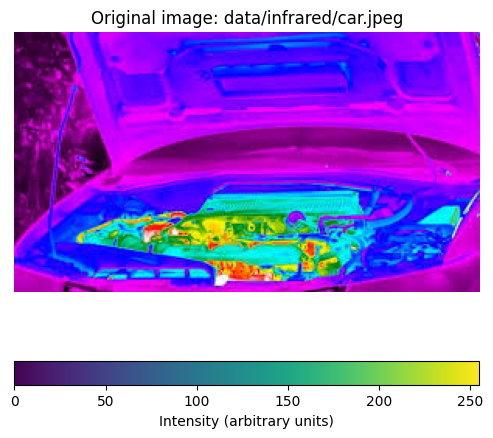

In [2]:
# Pick an image from the data folder
img_path = "data/infrared/car.jpeg"
img = Image.open(img_path)      
arr = np.array(img)

print("Image shape:", arr.shape)
print("Data type:", arr.dtype)

# Show the original image
plt.figure(figsize=(6,6))
plt.imshow(arr)
plt.title(f"Original image: {img_path}")
plt.colorbar(label="Intensity (arbitrary units)", orientation="horizontal")
plt.axis("off")
plt.show()

### Statistics

In [3]:
### Compute overall statistics
overall_stats = {
    "min": float(arr.min()),
    "max": float(arr.max()),
    "mean": float(arr.mean()),
    "std": float(arr.std()),
    "median": float(np.median(arr)),
}

# Compute per-channel statistics if RGB
channel_stats = {}
if arr.ndim == 3 and arr.shape[2] == 3:
    channels = ["Red", "Green", "Blue"]
    for i, c in enumerate(channels):
        channel_stats[c] = {
            "min": float(arr[:,:,i].min()),
            "max": float(arr[:,:,i].max()),
            "mean": float(arr[:,:,i].mean()),
            "std": float(arr[:,:,i].std()),
            "median": float(np.median(arr[:,:,i])),
        }

print("\nOverall statistics:")
for k,v in overall_stats.items():
    print(f"- {k}: {v}")

if channel_stats:
    print("\nPer-channel statistics:")
    for c, stats in channel_stats.items():
        print(f"  {c}:")
        for k,v in stats.items():
            print(f"    - {k}: {v}")


Overall statistics:
- min: 0.0
- max: 255.0
- mean: 118.89111772486773
- std: 99.43187108388716
- median: 118.0

Per-channel statistics:
  Red:
    - min: 0.0
    - max: 255.0
    - mean: 115.48333333333333
    - std: 74.3969074711432
    - median: 119.0
  Green:
    - min: 0.0
    - max: 255.0
    - mean: 36.08940476190476
    - std: 69.70681389659082
    - median: 3.0
  Blue:
    - min: 0.0
    - max: 255.0
    - mean: 205.10061507936507
    - std: 70.47224360462278
    - median: 246.0
